# Very basic 3 layer neural network

In this note book we are going to write simple neural network in python.
Let's begin with intruducing dataset we are going to work with.

| X1   | X2   |  X3  |  Y   |
|------|------|------|------|
| 0    | 0    |  1   |  0   |
| 0    | 1    |  1   |  1   |
| 1    | 0    |  1   |  1   |
| 1    | 1    |  1   |  0   |

Here the target is Y column and the input is left side of the table marked as X. 

In [77]:
import numpy as np

In [78]:
#input matrix
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
#desired output
y = np.array([[0,1,1,0]]).T

In [79]:
np.random.seed(1)

### Wieights initialization

In [80]:
#initialize random weights in first and hidden layer
w01 = np.random.random((3,4))
w12 = np.random.random((4,1))
print(w01, w12)

[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01]] [[0.20445225]
 [0.87811744]
 [0.02738759]
 [0.67046751]]


### Activation function
To activate layers we are going to use sigmoid function which returns a value between 0 and 1 for any given argument.

In [81]:
def sigmoid(x, deriv = False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

Here is sigmoid function in action:

Text(0.5, 1.0, 'Plot of sigmoid function')

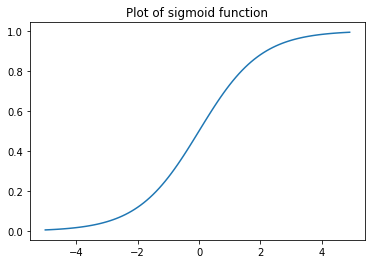

In [82]:
import matplotlib.pyplot as plt
import random
arr_x = [x/10 for x in range(-50, 50)]
arr_y = [sigmoid(x) for x in arr_x]
plt.plot(arr_x, arr_y)
plt.title("Plot of sigmoid function")

### Forward propagation
To keep the code little cleaner I've decided to form additional function for forward propagation. It will also be useful to actually predict once the net is trained. 

In [83]:
def feed_forward(X, w01, w12):
    l0 = X
    l1 = sigmoid(np.dot(l0,w01))
    l2 = sigmoid(np.dot(l1, w12))
    return l1, l2

### Training neural net

In [90]:
import math
EPOCHS = 10000
err = []
for it in range(EPOCHS):
    #feed forward
    l1, l2 = feed_forward(X, w01, w12)
    
    ####backpropagation###
    #error l2
    l2_error = y - l2
    
    err.append(math.fabs(np.mean(l2_error)))
    if (it%1000) == 0:
        print('error: ', err[it])
                
    #error scaled by confidance
    l2_delta = l2_error * sigmoid(l2, deriv = True)
    
    #contribution in l2 error 
    l1_error = l2_delta.dot(w12.T)
    
    '''
    l2 can be seen as output of l1 hence we can compute l1_error like this  
    '''
    l1_delta = l1_error * sigmoid(l1, deriv = True)
    
    w01 += np.dot(l0.T, l1_delta)
    w12 += np.dot(l1.T, l2_delta)
    

error:  0.0017230562764431467
error:  0.008121494406636263
error:  0.005185882965173158
error:  0.004091218664805347
error:  0.003472919363178892
error:  0.0030618572824205985
error:  0.0027631905959754257
error:  0.002533623433310858
error:  0.0023501493750479902
error:  0.0021992438258285063


### Learning plot

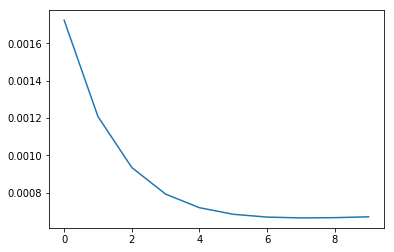

In [91]:
plt.plot(range(EPOCHS)[:10], err[:10])

### Results

In [92]:
l1, l2 =feed_forward(X, w01, w12)
print(l2)

[[0.00410928]
 [0.98532125]
 [0.98526649]
 [0.01701354]]


As we can see results are highly satisfying and true about our target Y. 